# Handwritten Digits Classifier

<p align="center">
<img src="img/digits.gif">
</p>

The MNIST database contains binary images of **handwritten digits**. The original black and white images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.The database has a training set of 60,000 examples, and a test set of 10,000 examples. There are 10 classes (one for each of the 10 digits). **The task at hand is to train a model using the 60,000 training images and subsequently test its classification accuracy on the 10,000 test images**.

# 1. Imports 

In [25]:
# imports
import pandas as pd
import numpy  as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model    import Perceptron

from yellowbrick.classifier  import ConfusionMatrix

import random
import pickle
import warnings
warnings.filterwarnings( "ignore" )

## 1.1. Load data

In [2]:
# Load data
from mnist import MNIST

mndata = MNIST( 'datasets/images_handwritten_digits' )

image_train, label_train = mndata.load_training( )
image_test, label_test = mndata.load_testing( )

In [6]:
# View an image
index = random.randrange( 0, len( image_train ) ) 
print( mndata.display( image_train[index] ) )


............................
............................
............................
............................
............................
............................
............................
............@...............
.........@@@@@@@@..@@.......
.........@@@@@@@@@@@@@......
.......@@@@....@@@@@@.......
......@@@@........@@@.......
......@@.........@@@........
.................@@@........
................@@@@........
................@@@.........
...............@@@..........
...............@@@..........
..............@@@...........
..............@@@...........
.............@@@............
............@@@@............
............@@@.............
............@@@.............
............@@@.............
...........@@@..............
............@...............
............................


# 2. Preprocessing

In [3]:
# Data transformation
image_train = pd.DataFrame( image_train )
image_test = pd.DataFrame( image_test )
label_train = pd.DataFrame( label_train )
label_test = pd.DataFrame( label_test )

**It may seem strange to join the data as it is already divided for training and testing, but the idea here is to separate a larger part of the data to train the model using the hold-out technique, and also use cross validation, in order to compare both training methods.**

In [4]:
# Joining image Dataframes
X = pd.concat( [image_train, image_test], ignore_index=True )

# Joining target Dataframes
y = pd.concat( [label_train, label_test], ignore_index=True )

In [5]:
# Data dimensions of image dataframe
print( 'Number of rows: ', X.shape[0] )
print( 'Number of columns: ', X.shape[1] )

Number of rows:  70000
Number of columns:  784


In [6]:
# Data dimensions of target dataframe
print( 'Number of rows: ', y.shape[0] )
print( 'Number of columns: ', y.shape[1] )

Number of rows:  70000
Number of columns:  1


In [7]:
# Splitting data with hold-out
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 11 )

# 3. Model Building

## Functions

In [36]:
# Building and training a Multilayer Perceptron Model
def build_mlp_model( hls, activation, solver, X_train, y_train ):
    mlp = MLPClassifier( hidden_layer_sizes=hls, activation=activation, solver=solver, random_state=11 )
    mlp_trained = mlp.fit( X_train, y_train )
    
    return mlp_trained 

# Confusion matrix with yellowbrick library
def show_confusion_matrix( model, X_train, y_train, X_test, y_test ):
    v = ConfusionMatrix( model )
    v.fit( X_train, y_train )
    v.score( X_test, y_test )
    v.poof()
    
    return None

# Evaluate each model in turn
def evaluate_models( models, cv, X_train, y_train, X_test, y_test, X, y ):

    for name, model in models:
        # hold-out
        y_pred = model.predict( X_test )
        result = accuracy_score( y_test, y_pred )
        
        # cross validation
        cv_result = cross_val_score( model, X, y, cv=cv, scoring='accuracy' )
        
        print('--------------------------------------------------------------------')
        
        print(f'{name}')
        
        print(f'Hold-out result: {result}')
        show_confusion_matrix( model, X_train, y_train, X_test, y_test)
        
        print(f'Cross validation result: {np.mean(cv_result)} ({np.std(cv_result)})' )

## 3.1. Multilayer Perceptron

In [37]:
# Building MLP models
mlp_1 = build_mlp_model( (15, ), 'logistic', 'sgd', X_train, y_train )

mlp_2 = build_mlp_model( (15, 10,), 'relu', 'lbfgs', X_train, y_train )

mlp_3 = build_mlp_model( (10, 10, 5), 'tanh', 'sgd', X_train, y_train )

mlp_4 = build_mlp_model( (20, 15), 'identity', 'adam', X_train, y_train )

mlp_5 = build_mlp_model( (20, 15, 10), 'relu', 'lbfgs', X_train, y_train )

--------------------------------------------------------------------
MLP_1
Hold-out result: 0.9129047619047619


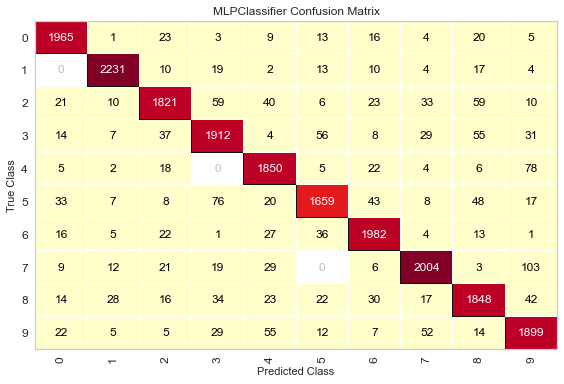

Cross validation result: 0.9109999999999999 (0.005649092395948168)
--------------------------------------------------------------------
MLP_2
Hold-out result: 0.9129047619047619


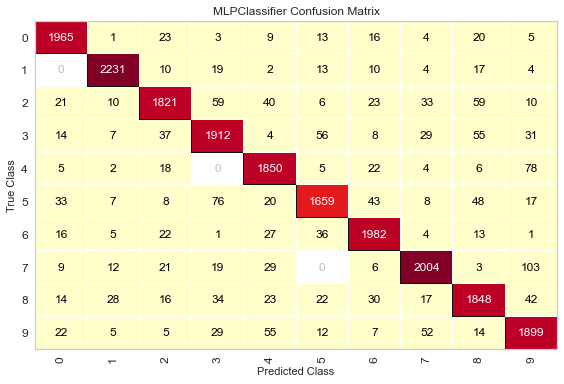

Cross validation result: 0.9109999999999999 (0.005649092395948168)
--------------------------------------------------------------------
MLP_3
Hold-out result: 0.9129047619047619


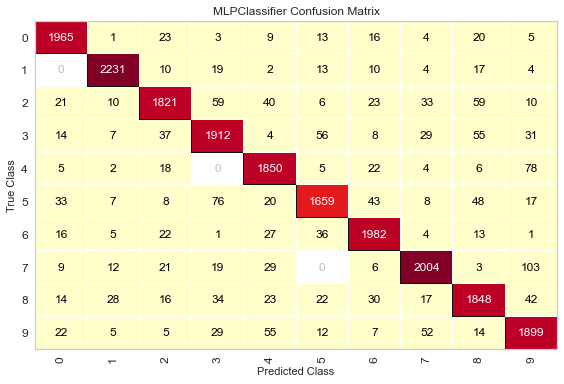

Cross validation result: 0.9109999999999999 (0.005649092395948168)
--------------------------------------------------------------------
MLP_4
Hold-out result: 0.9129047619047619


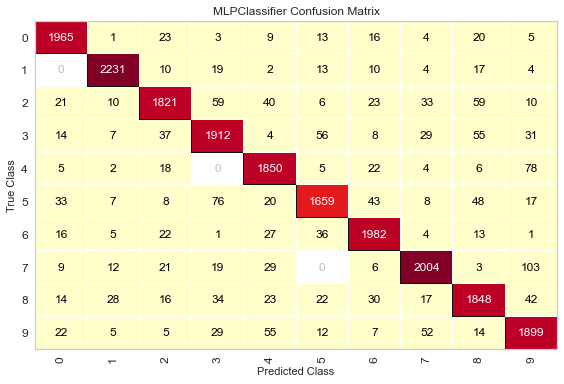

Cross validation result: 0.9109999999999999 (0.005649092395948168)
--------------------------------------------------------------------
MLP_5
Hold-out result: 0.9129047619047619


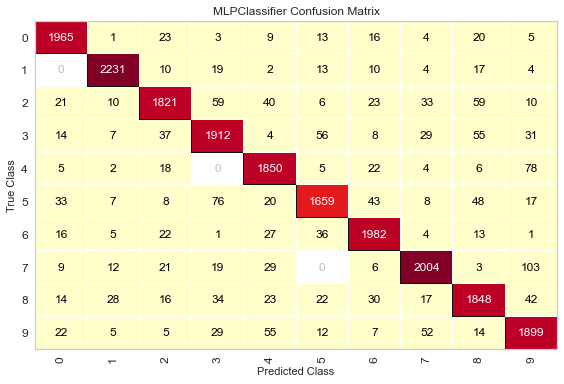

Cross validation result: 0.9109999999999999 (0.005649092395948168)


In [39]:
# Evaluate models performance
models = []
models.append(('MLP_1', mlp_1))
models.append(('MLP_2', mlp_2))
models.append(('MLP_3', mlp_3))
models.append(('MLP_4', mlp_4))
models.append(('MLP_5', mlp_5))

evaluate_models(models, 5, X_train, y_train, X_test, y_test, X, y )